# Classical Runge Kutta

This Exam Question 5

Consider the initial value problems (1) and (2). In this problem you must describe the classical Runge-Kutta method for solution of thse problems, implement a solver, and test it for the test problems describes in problem 1.

2. Implement an algorithm for classical Runge-Kutta with fixed time-step. 

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Test functions
def PreyPredator(t, x, a, b):
    x1, x2 = x
    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2
    return [dx1,dx2]

def VanDerPol(t,x,mu):

    x1_ = x[1]

    x2_ = mu*(1-x[0]**2)*x[1]-x[0]

    return [x1_,x2_]

def CSTR_3state(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med E
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C


    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T)
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])
    F = 250#v * A
    r=k*CA*CB
    
    # Reaction rate
    R = v.T*r #v transposed

    
    # Calculating the change in concentration
    system = (C0-C) * F/V + R
    dCA, dCB, dT = system

    return [dCA, dCB, dT]

def CSTR_1state(t, T, Tin):

    T = T[0]
    # Constants from Wahlgreen et al. (2020)
    deltaHr = -560               # kJ/mol
    rho = 1.0                    # kg/L
    cp = 4.186                   # kJ/(kg*K)
    Ea_over_R = 8500             # K
    k0 = np.exp(24.6)            # L/(mol*s)
    V = 0.105                    # L
    F = 250                      # L/s

    CA_in = 1.6/2                # mol/L
    CB_in = 2.4/2                # mol/L

    beta = -deltaHr / (rho * cp)


    CA = CA_in + 1/beta * (T0-T)
    CB = CB_in + 2/beta * (T0-T)

    k = k0 * np.exp(-Ea_over_R/T)

    r = k * CA * CB


    dTdt = (Tin - T) * F/V + beta * r

    return np.array([dTdt])

## Runge Kutta fixed step size

In [91]:
def RungeKuttaFixedStep(fun, t0, x0, h, N, A, b, c, *args):
    x0 = np.array(x0)
    s = len(b) #constants find out in week 
    d = len(x0)

    Tout = np.zeros(N + 1)
    Xout = np.zeros((N + 1, d))

    t = t0
    x = x0.copy()


    Tout[0] = t
    Xout[0] = x


    for n in range(N):
        T = np.zeros(s)
        X = np.zeros((d, s))
        F = np.zeros((d, s))

        # Stage 1
        T[0] = t
        X[:, 0] = x
        F[:, 0] = fun(T[0], X[:, 0], *args)

        # Stage 2 to s
        for i in range(1, s):
            T[i] = t + h * c[i]
            X[:, i] = x + h * F[:, :i] @ A[:i, i]
            F[:, i] = fun(T[i], X[:, i], *args)

        # Next step
        t = t + h
        x = x + h * F @ b

        
        Tout[n + 1] = t
        Xout[n + 1] = x


    return Tout, Xout


## Testing fixed step size
### Prey predator

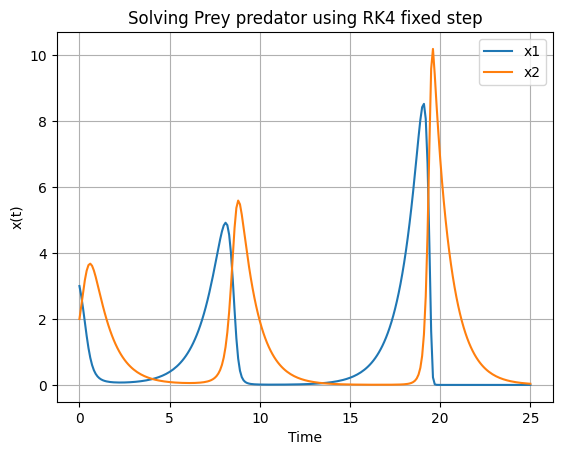

In [92]:
# Butcher tableau for classic RK4
A = np.array([
    [0,   0,   0, 0],
    [0.5, 0,   0, 0],
    [0,   0.5, 0, 0],
    [0,   0,   1, 0]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1.0])

# Initial conditions and settings
t0 = 0
x0 = [1.0,1.0]
h = 0.1
N = 250
a_pred, b_prey = 1.0, 1.0
x0_pp = [3.0, 2.0]

# Run the solver
Tout, Xout = RungeKuttaFixedStep(PreyPredator, t0, x0_pp, h, N, A, b, c,a_pred,b_prey)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='x1')
plt.plot(Tout, Xout[:, 1], label='x2')
#plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving Prey predator using RK4 fixed step')
plt.legend()
plt.grid()
plt.show()

### Van der pol

C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:15: RuntimeWarning: overflow encountered in scalar multiply
  x2_ = mu*(1-x[0]**2)*x[1]-x[0]
C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\4184707986.py:30: RuntimeWarning: invalid value encountered in matmul
  X[:, i] = x + h * F[:, :i] @ A[:i, i]


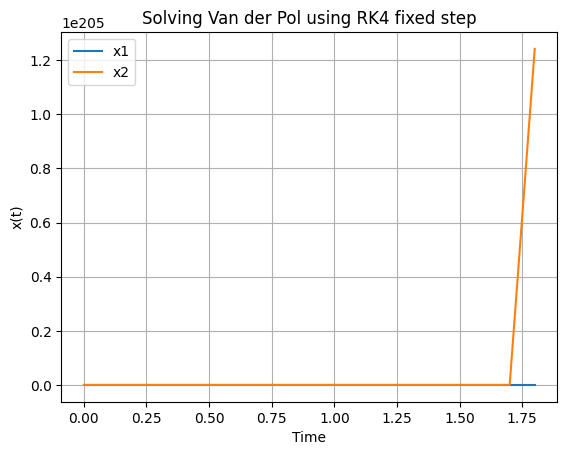

In [93]:
# Initial conditions and settings

mu = 10
x0 = np.array([2.0, 0.0])
t_span = (0, 20)
t0 = t_span[0]
TN = t_span[1]
h=0.1
N = 100

# Run the solver
Tout, Xout = RungeKuttaFixedStep(VanDerPol, t0, x0, h, N, A, b, c, mu)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='x1')
plt.plot(Tout, Xout[:, 1], label='x2')
#plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving Van der Pol using RK4 fixed step')
plt.legend()
plt.grid()
plt.show()

## CSTR

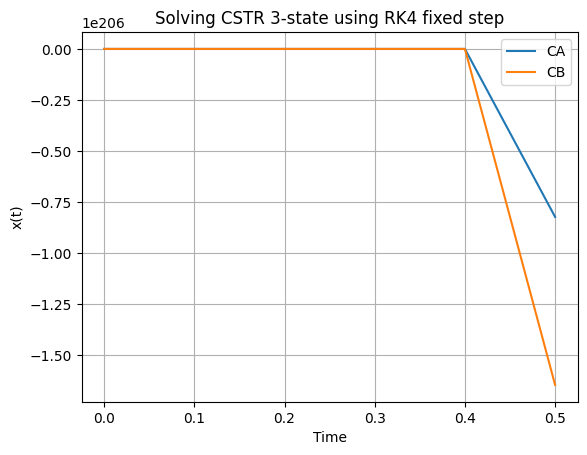

In [94]:
# Initial conditions and settings
C0 = np.array([1.6/2, 2.4/2, 600])  # Initial condition
Cin = np.array([1.6/2, 2.4/2,600]) # Assume inlet concentration = initial for now

t_span = (0, 20)
t0 = t_span[0]
TN = t_span[1]
h=0.1
N = 5

# Run the solver
Tout, Xout = RungeKuttaFixedStep(CSTR_3state, t0, C0, h, N, A, b, c, Cin)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='CA')
plt.plot(Tout, Xout[:, 1], label='CB')
#plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving CSTR 3-state using RK4 fixed step')
plt.legend()
plt.grid()
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:72: RuntimeWarning: overflow encountered in multiply
  r = k * CA * CB
C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\4184707986.py:30: RuntimeWarning: invalid value encountered in matmul
  X[:, i] = x + h * F[:, :i] @ A[:i, i]


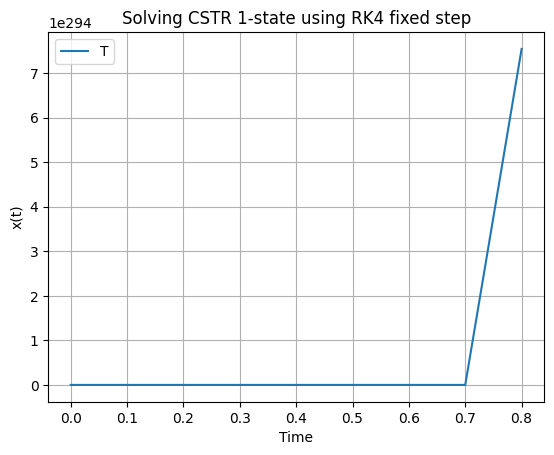

In [95]:

# Set initial and inlet conditions
T0 = np.array([273.15])       # initial reactor temperature
Tin = np.array([273.15])     # inlet feed temperature

t_span = (0, 20)
t0 = t_span[0]
TN = t_span[1]
h=0.1
N = 50

# Run the solver
Tout, Xout = RungeKuttaFixedStep(CSTR_1state, t0, T0, h, N, A, b, c, Tin)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='T')
#plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving CSTR 1-state using RK4 fixed step')
plt.legend()
plt.grid()
plt.show()

#

## Runge kutta adaptive step size

In [96]:
def ClassicalRungeKuttaStep(fun,t,x,f,h,*args):
    h2 = 0.5*h      # Half the step size
    alpha = h/6     # Weight for F1, F4
    beta = h/3      # Weight for F2, F3

    x = np.array(x, dtype=float)  # Ensure x is a NumPy array
    t = np.array(t, dtype=float)  # Ensure x is a NumPy array
    f = np.array(f, dtype=float)  # Ensure x is a NumPy array

    T1=t
    X1=x
    F1=f

    # Half a step
    T2 = t+h2
    X2 = x+h2*F1 
    F2 = np.array(fun(T2,X2,*args))
    
    T3=T2
    X3 = x+h*F2
    F3 = np.array(fun(T3, X3, *args))

    T4 = t+h
    X4 = x+h*F3
    F4 = np.array(fun(T4,X4,*args))

    t1 = T4
    x1 = x + alpha*(F1+F4)+beta*(F2+F3)  

    return t1, x1


def ClassicalRungeKuttaAdaptiveStep(fun,tspan,x0,h0,abstol,reltol,*args):
    # Error controller parameters
    epstol = 0.8  # Safety factor
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor

    # Integration interval
    t0, tf = tspan

    # Initial conditions
    t = t0
    h = h0
    x = np.array(x0, dtype=float)  # Ensure x is a NumPy array
    #print("first time iteration")
    # Counters
    nfun = 0
    naccept = 0
    nreject = 0
    
    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array
    E = np.array(np.zeros(np.shape(x))) # Local error

    while t < tf:

        if (t+h > tf):
            h = tf-t

        f = fun(t,x,*args)

        AcceptStep = False

        while not AcceptStep:

            t1,x1 = ClassicalRungeKuttaStep(fun,t,x,f,h,*args)

            hm = 0.5*h
            
            tm,xm = ClassicalRungeKuttaStep(fun,t,x,f,hm,*args)


            fm = fun(tm,xm,*args)
            
            t1hat,x1hat = ClassicalRungeKuttaStep(fun,tm,xm,fm,hm,*args)

            
            # Number of function calls
            nfun+=12
            #print("x1hat", x1hat)
            #print("x", x)
            
            e = np.array(x1hat -x1)

            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            r = np.max(np.abs(e) / denom)  # Compute max ratio
        
            AcceptStep = (r <= epstol)

            if AcceptStep:

                
                t = t + h
                x = x1hat
                naccept+=1
                

                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
                E = np.vstack([E, np.abs(e.reshape(1, -1))])
                #print("This is T: ", len(T))
                #print("This is E: ",len(E))

            else: 
                nreject+=1
                
            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h

    
    return T, X, E, nfun, naccept, nreject


## Testing adaptive step

Number of function calls 2880
Number of accepted steps 155
Number of rejected steps 85


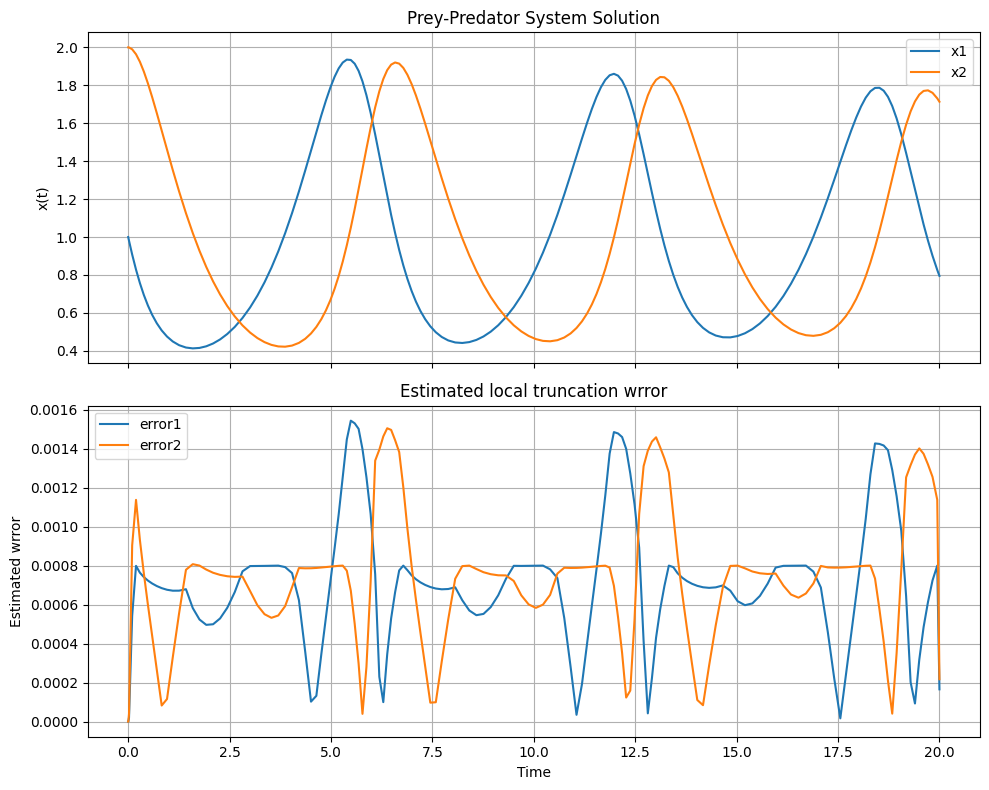

In [97]:
reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 20)
x0=np.array([1.0,2.0])

# Run the solver
Tout, Xout, E, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(PreyPredator,tspan,x0,h0,abstol,reltol,a_pred,b_prey)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# system simulation
ax1.plot(Tout, Xout[:, 0], label='x1')
ax1.plot(Tout, Xout[:, 1], label='x2')
ax1.set_ylabel('x(t)')
ax1.set_title('Prey-Predator System Solution')
ax1.legend()
ax1.grid()

# error estimates
ax2.plot(Tout, E[:, 0], label='error1')
ax2.plot(Tout, E[:, 1], label='error2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Estimated wrror')
ax2.set_title('Estimated local truncation wrror')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

Number of function calls 7296
Number of accepted steps 309
Number of rejected steps 299


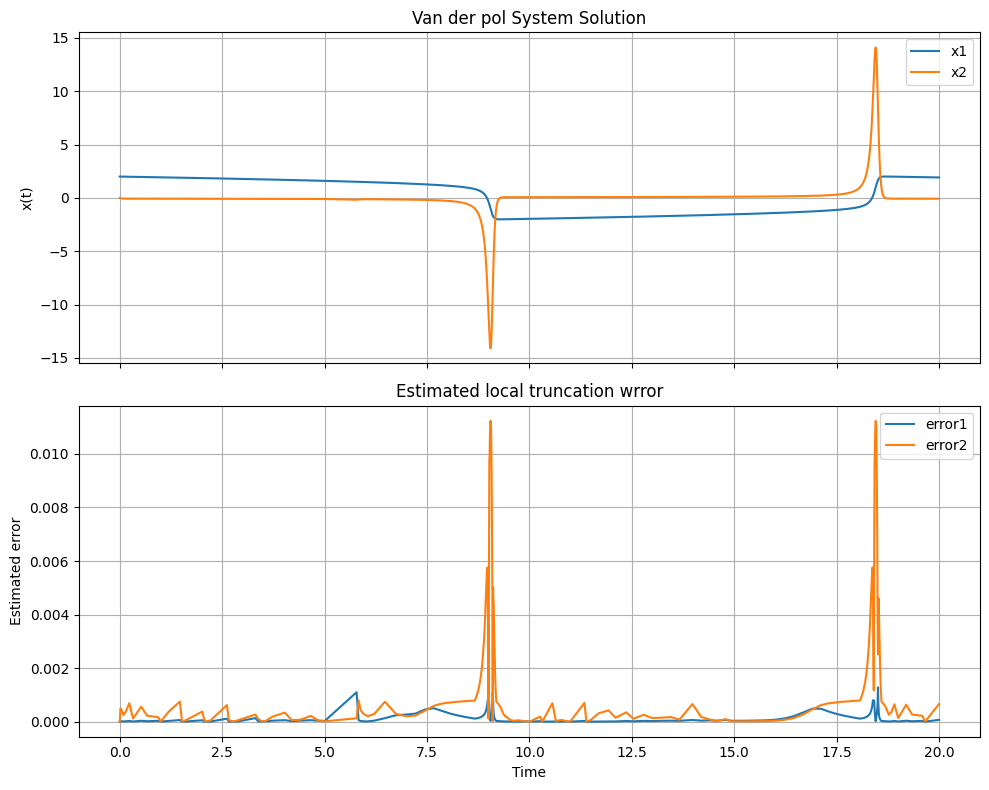

In [98]:
reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 20)
mu = 10
x0 = np.array([2.0, 0.0])

# Run the solver
Tout, Xout, E, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(VanDerPol,tspan,x0,h0,abstol,reltol,mu)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# system simulation
ax1.plot(Tout, Xout[:, 0], label='x1')
ax1.plot(Tout, Xout[:, 1], label='x2')
ax1.set_ylabel('x(t)')
ax1.set_title('Van der pol System Solution')
ax1.legend()
ax1.grid()

# error estimates
ax2.plot(Tout, E[:, 0], label='error1')
ax2.plot(Tout, E[:, 1], label='error2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Estimated error')
ax2.set_title('Estimated local truncation wrror')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

In [ ]:
reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 5)

# Initial conditions and settings
C0 = np.array([1.6/2, 2.4/2, 600])  # Initial condition
Cin = np.array([1.6/2, 2.4/2,600]) # Assume inlet concentration = initial for now

# Run the solver
Tout, Xout, E, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(CSTR_1state,tspan,T0,h0,abstol,reltol,Tin)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# system simulation
ax1.plot(Tout, Xout[:, 0], label='CA')
ax1.plot(Tout, Xout[:, 1], label='CB')
ax1.set_ylabel('x(t)')
ax1.set_title('CSTR 3-state simulation')
ax1.legend()
ax1.grid()

# error estimates
ax2.plot(Tout, E[:, 0], label='error1')
ax2.plot(Tout, E[:, 1], label='error2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Estimated error')
ax2.set_title('Estimated local truncation error')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:70: RuntimeWarning: overflow encountered in exp
  k = k0 * np.exp(-Ea_over_R/T)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:75: RuntimeWarning: invalid value encountered in add
  dTdt = (Tin - T) * F/V + beta * r


In [ ]:
reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 5)

# Initial conditions and settings
T0 = np.array([273.15])       # initial reactor temperature
Tin = np.array([273.15])     # inlet feed temperature

# Run the solver
Tout, Xout, E, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(CSTR_1state,tspan,T0,h0,abstol,reltol,Tin)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# system simulation
ax1.plot(Tout, Xout[:, 0], label='T')

ax1.set_ylabel('Temperature')
ax1.set_title('CSTR 1-state Solution')
ax1.legend()
ax1.grid()

# error estimates
ax2.plot(Tout, E[:, 0], label='error1')
ax2.set_xlabel('Time')
ax2.set_ylabel('Estimated error')
ax2.set_title('Estimated local truncation error')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:70: RuntimeWarning: overflow encountered in exp
  k = k0 * np.exp(-Ea_over_R/T)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_11040\257317718.py:75: RuntimeWarning: invalid value encountered in add
  dTdt = (Tin - T) * F/V + beta * r


KeyboardInterrupt: 